In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew 

In [2]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.sample(5)

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
893,528228440,1269,192000,120,RL,43.0,3182,Pave,NaN,Reg,...,144,0,NaN,NaN,NaN,0,4,2010,WD,Normal
373,906385020,1222,187000,20,RL,64.0,7360,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
318,909254130,1646,164000,75,RL,53.0,7128,Pave,NaN,Reg,...,126,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal
660,535378120,1078,125000,30,RL,60.0,10230,Pave,Grvl,Reg,...,112,0,NaN,GdWo,NaN,0,12,2009,WD,Normal
477,534251280,1632,173000,60,RL,NaN,9130,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


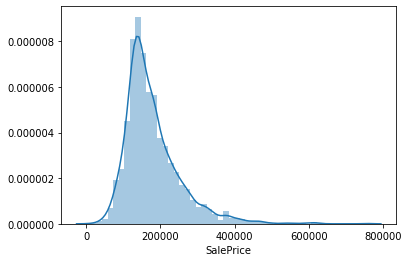

In [3]:
#check saleprice(target value)
sns.distplot(housing['SalePrice'])

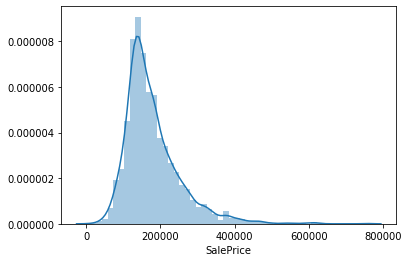

In [4]:

sns.distplot(housing['SalePrice']);

In [5]:
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.651163
MiscFeature,96.240310
Alley,93.488372
Fence,79.651163
FireplaceQu,48.100775
LotFrontage,17.906977
GarageYrBlt,5.000000
GarageCond,5.000000
GarageQual,5.000000
GarageFinish,5.000000


Text(0.5, 1.0, 'Percent missing data by feature')

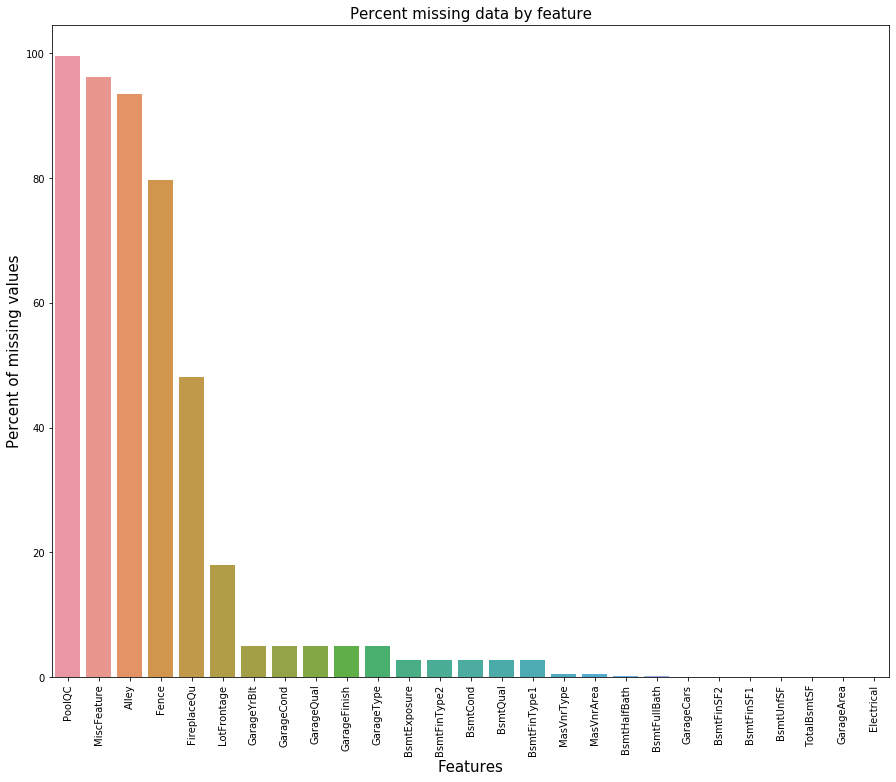

In [6]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_na.index, y=all_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Features cleaning

### PoolQC

In [7]:
housing["PoolQC"].value_counts()

TA    3
Fa    2
Gd    2
Ex    2
Name: PoolQC, dtype: int64

In [8]:
housing["PoolQC"] = housing["PoolQC"].fillna("None")
housing["PoolQC"].value_counts()

None    2571
TA         3
Fa         2
Gd         2
Ex         2
Name: PoolQC, dtype: int64

### MiscFeature

In [9]:
housing["MiscFeature"].value_counts()

Shed    88
Gar2     5
Othr     3
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
housing["MiscFeature"] = housing["MiscFeature"].fillna("None")
housing["MiscFeature"].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

### Alley

In [11]:
housing["Alley"].value_counts()

Grvl    105
Pave     63
Name: Alley, dtype: int64

In [12]:
housing["Alley"] = housing["Alley"].fillna("None")
housing["Alley"].value_counts()

None    2412
Grvl     105
Pave      63
Name: Alley, dtype: int64

### Fence

In [13]:
housing["Fence"].value_counts()

MnPrv    301
GdPrv    111
GdWo     103
MnWw      10
Name: Fence, dtype: int64

In [14]:
housing["Fence"] = housing["Fence"].fillna("None")
housing["Fence"].value_counts()

None     2055
MnPrv     301
GdPrv     111
GdWo      103
MnWw       10
Name: Fence, dtype: int64

### FireplaceQu

In [15]:
housing["FireplaceQu"].value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [16]:
housing["FireplaceQu"] = housing["FireplaceQu"].fillna("None")
housing["FireplaceQu"].value_counts()

None    1241
Gd       619
TA       572
Fa        70
Po        43
Ex        35
Name: FireplaceQu, dtype: int64

### LotFrontage

In [17]:
#LotFrontage: Linear feet of street connected to property
#fill with medium of neighborhood's LotFrontage
housing["LotFrontage"].describe()

count    2118.000000
mean       68.516053
std        22.835831
min        21.000000
25%        57.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
housing["LotFrontage"].fillna(housing.groupby("Neighborhood")["LotFrontage"].transform("median"), inplace=True)
housing[["Neighborhood","LotFrontage"]].head(30)

,Neighborhood,LotFrontage
1,SWISU,60.0
2,Edwards,42.0
3,IDOTRR,60.0
4,OldTown,80.0
5,NWAmes,70.0
6,Edwards,64.0
7,OldTown,60.0
8,Blmngtn,53.0
9,Mitchel,74.0
10,Edwards,35.0


### GarageYrBlt, GarageType, GarageCars, GarageArea, GarageQual, GarageCond, GarageFinish

In [19]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head() 

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939.0,Detchd,2.0,399.0,TA,TA,Unf
2,1984.0,Attchd,1.0,266.0,TA,TA,Fin
3,1930.0,Detchd,1.0,216.0,TA,Po,Unf
4,1940.0,Detchd,1.0,281.0,TA,TA,Unf
5,2001.0,Attchd,2.0,528.0,TA,TA,Fin


In [20]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna("None")
housing['GarageType'] = housing['GarageType'].fillna("None")
housing['GarageQual'] = housing['GarageQual'].fillna("None")
housing['GarageCond'] = housing['GarageCond'].fillna("None")
housing['GarageFinish'] = housing['GarageFinish'].fillna("None")
housing['GarageCars'] = housing['GarageCars'].fillna(0)
housing['GarageArea'] = housing['GarageArea'].fillna(0)

In [21]:
housing[['GarageYrBlt','GarageType','GarageCars','GarageArea','GarageQual','GarageCond','GarageFinish']].head()

,GarageYrBlt,GarageType,GarageCars,GarageArea,GarageQual,GarageCond,GarageFinish
1,1939,Detchd,2.0,399.0,TA,TA,Unf
2,1984,Attchd,1.0,266.0,TA,TA,Fin
3,1930,Detchd,1.0,216.0,TA,Po,Unf
4,1940,Detchd,1.0,281.0,TA,TA,Unf
5,2001,Attchd,2.0,528.0,TA,TA,Fin


### BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual, BsmtFullBath, BsmtHalfBath,TotalBsmtSF, BsmtFinSF1,BsmtFinSF2,BsmtUnfSF

In [22]:
#check null values

housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF']].head(20) 

#if one col is null, all of these columns are null

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0,238.0,0.0,618.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0,552.0,393.0,104.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0,737.0,0.0,100.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0,643.0,0.0,167.0
6,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0,647.0,0.0,217.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0,467.0,0.0,80.0


In [23]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna("None")
housing['BsmtExposure'] = housing['BsmtExposure'].fillna("None")
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna("None")
housing['BsmtCond'] = housing['BsmtCond'].fillna("None")
housing['BsmtQual'] = housing['BsmtQual'].fillna("None")
housing['BsmtFullBath'] = housing['BsmtFullBath'].fillna(0)
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].fillna(0)
housing['TotalBsmtSF'] = housing['TotalBsmtSF'].fillna(0)
housing['BsmtFinSF1'] = housing['BsmtFinSF1'].fillna(0)
housing['BsmtFinSF2'] = housing['BsmtFinSF2'].fillna(0)
housing['BsmtUnfSF'] = housing['BsmtUnfSF'].fillna(0)

In [24]:
housing[['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual','BsmtFullBath','BsmtHalfBath','TotalBsmtSF']].head(20) 

,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
1,Unf,No,Rec,TA,TA,1.0,0.0,856.0
2,ALQ,Mn,GLQ,TA,Gd,1.0,0.0,1049.0
3,Unf,No,ALQ,TA,TA,0.0,0.0,837.0
4,Unf,No,Unf,TA,Fa,0.0,0.0,405.0
5,Unf,No,GLQ,TA,Gd,1.0,0.0,810.0
6,None,None,None,None,None,0.0,0.0,0.0
7,Unf,No,Unf,TA,Fa,0.0,0.0,936.0
8,Unf,Gd,Unf,TA,Gd,0.0,0.0,1146.0
9,Unf,No,ALQ,TA,TA,0.0,0.0,864.0
10,Unf,Gd,GLQ,TA,Gd,1.0,0.0,547.0


### MasVnrArea, MasVnrType

In [25]:
# 0 MasVnrArea means no Masonry veneer
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
housing['MasVnrType'] = housing['MasVnrType'].fillna("None")

In [26]:
housing['MasVnrArea'].value_counts()

0.0      1568
120.0      13
216.0      11
108.0      10
176.0      10
         ... 
647.0       1
549.0       1
262.0       1
668.0       1
402.0       1
Name: MasVnrArea, Length: 416, dtype: int64

In [27]:
housing['MasVnrType'].value_counts() 

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

### Electrical

In [28]:
#only one null value of electrical
housing['Electrical'].value_counts() #SBrkr is most frequent value so we fill null as SBrkr

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [29]:
housing['Electrical'] = housing['Electrical'].fillna("SBrkr")

### MSZoning

In [30]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [31]:
#fill Nan with RL which is most frequent value
housing['MSZoning'] = housing['MSZoning'].fillna("RL")

In [32]:
housing['MSZoning'].value_counts()

RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

### Utilities

In [33]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [34]:
#fill Nan with Allpub which is most frequent value 
housing['Utilities'] = housing['Utilities'].fillna("AllPub")

In [35]:
housing['Utilities'].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

### Functional

In [36]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [37]:
#fill Nan with Typ which is most frequent value
housing['Functional'] = housing['Functional'].fillna("Typ")

In [38]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

### SaleType

In [39]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [40]:
housing['SaleType'] = housing['SaleType'].fillna("WD")
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

### KitchenQual

In [41]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [42]:
housing['KitchenQual'] = housing['KitchenQual'].fillna("TA")

In [43]:
housing['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

### Exterior1st and Exterior2nd

In [44]:
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [45]:
housing['Exterior1st'] = housing['Exterior1st'].fillna("VinylSd")
housing['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [46]:
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

In [47]:
housing['Exterior2nd'] = housing['Exterior2nd'].fillna("VinylSd")
housing['Exterior2nd'].value_counts()

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     97
Wd Shng     76
BrkFace     46
Stucco      37
AsbShng     31
Brk Cmn     21
ImStucc     13
AsphShn      4
Stone        4
CBlock       3
PreCast      1
Name: Exterior2nd, dtype: int64

### Check every features

In [48]:
#check null values 
all_na = (housing.isnull().sum() / len(housing)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
LotFrontage,0.116279


### Utilities

In [49]:
housing["Utilities"].value_counts()

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

In [50]:
# Since Utilities feature have almost same value, so we better remove it
housing.drop('Utilities', axis=1, inplace=True)

### Correlation

In [51]:
corr = housing.corr(method='pearson').drop(['SalePrice']).sort_values('SalePrice', ascending=False)['SalePrice']
corr 

OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638424
GarageArea       0.634669
YearBuilt        0.544370
FullBath         0.534982
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
LotFrontage      0.354196
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033786
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePrice, dtype: float64

In [52]:
# we better delete correlation range from -0.1 ~ 0.1 but will see after result from it
housing.drop('3SsnPorch', axis=1, inplace=True)
housing.drop('PoolArea', axis=1, inplace=True)
housing.drop('BsmtFinSF2', axis=1, inplace=True)
housing.drop('MoSold', axis=1, inplace=True)
housing.drop('YrSold', axis=1, inplace=True)
housing.drop('MiscVal', axis=1, inplace=True)
housing.drop('BsmtHalfBath', axis=1, inplace=True)
housing.drop('LowQualFinSF', axis=1, inplace=True)
housing.drop('OverallCond', axis=1, inplace=True)
housing.drop('MSSubClass', axis=1, inplace=True)

In [53]:
housing.shape #delete 10 cols

(2580, 70)

In [54]:
housing.columns


Index(['PID', 'GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'PoolQC', 

In [55]:
#get the numeric values
numeric_features = housing.dtypes[housing.dtypes != "object"].index
numeric_features

Index(['PID', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [56]:
# Check the skew of all numerical features
skewed_feats = housing[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
LotArea,13.065941
KitchenAbvGr,4.528610
EnclosedPorch,4.039450
ScreenPorch,3.988307
MasVnrArea,2.672562
OpenPorchSF,2.603783
WoodDeckSF,1.845948
SalePrice,1.759778
LotFrontage,1.137707
1stFlrSF,1.043104


In [57]:
skewness = skewness[abs(skewness)>0.5]
housing[skewness.index] = np.log1p(housing[skewness.index])

In [58]:
# Check the skew of all numerical features

skewed_feats = housing[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
KitchenAbvGr,3.849935
ScreenPorch,2.947830
EnclosedPorch,1.942695
HalfBath,0.573839
MasVnrArea,0.554752
BsmtFullBath,0.372438
2ndFlrSF,0.287925
Fireplaces,0.223013
WoodDeckSF,0.143206
PID,0.051365


In [59]:
housing.head()

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,20.628049,6.753438,11.744045,RL,4.110874,8.973478,Pave,None,Reg,Lvl,...,Y,0.000000,0.000000,0.000000,5.117994,None,None,None,WD,Normal
2,20.623972,6.956545,11.845827,RL,3.761200,8.351375,Pave,None,Reg,Lvl,...,Y,0.000000,4.663439,0.000000,0.000000,None,None,None,WD,Normal
3,20.630194,6.909753,11.735277,C (all),4.110874,8.709630,Pave,None,Reg,Lvl,...,N,5.043425,0.000000,3.761200,0.000000,None,None,None,WD,Normal
4,20.098482,6.946976,11.643962,RL,4.394449,9.005405,Pave,None,Reg,Lvl,...,N,0.000000,0.000000,5.129899,4.718499,None,None,None,WD,Normal
5,20.096238,7.418181,12.332710,RL,4.262680,9.036106,Pave,None,Reg,Lvl,...,Y,0.000000,3.828641,0.000000,0.000000,None,None,None,WD,Normal


In [60]:
categorical_features = housing.dtypes[housing.dtypes == "object"].index
categorical_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [125]:
# process columns, apply LabelEncoder to categorical features
for categorical in categorical_features:
    lbl = LabelEncoder() 
    lbl.fit(list(housing[categorical].values)) 
    housing[categorical] = lbl.transform(list(housing[categorical].values))

# shape        
housing.shape

(2580, 70)

In [61]:
#Create
housing2 = housing.copy()
housing2['PriceSqft'] = housing.SalePrice/housing.GrLivArea

In [62]:
housing2.sample()

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,PriceSqft
348,20.094689,7.51915,12.861001,RL,4.234107,10.825204,Pave,None,IR1,Low,...,6.754604,4.290459,0.0,0.0,None,None,None,WD,Normal,1.710433


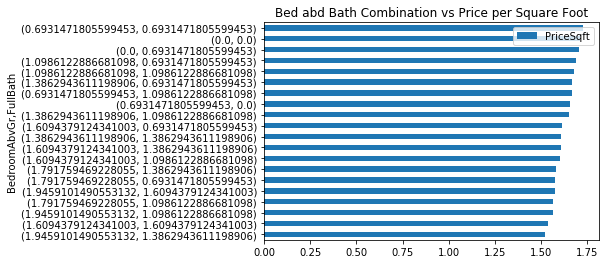

In [63]:
#housing2.loc[housing2.BedroomAbvGr >=1].\
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft':'mean'}).\
sort_values(by='PriceSqft').plot(kind='barh', title='Bed abd Bath Combination vs Price per Square Foot')
plt.show()

In [64]:
housing2.groupby(['BedroomAbvGr', 'FullBath']).agg({'PriceSqft': 'mean'}).reset_index().\
pivot(index='BedroomAbvGr', columns='FullBath', values='PriceSqft')

FullBath,0.000000,0.693147,1.098612,1.386294,1.609438
BedroomAbvGr,,,,,
0.000000,1.709888,1.703790,NaN,NaN,NaN
0.693147,1.657065,1.725041,1.665181,NaN,NaN
1.098612,NaN,1.689757,1.679468,NaN,NaN
1.386294,NaN,1.667747,1.649783,1.608608,NaN
1.609438,NaN,1.614634,1.602990,1.607377,1.536084
1.791759,NaN,1.577242,1.563125,1.580516,NaN
1.945910,NaN,NaN,1.562527,1.520158,1.576226


In [65]:
housing2['bed_bath'] = housing['BedroomAbvGr'].apply(str).str.cat(housing['FullBath'].apply(str) , sep="-")
housing2

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,PriceSqft,bed_bath
1,20.628049,6.753438,11.744045,RL,4.110874,8.973478,Pave,None,Reg,Lvl,...,0.000000,0.000000,5.117994,None,None,None,WD,Normal,1.738973,1.0986122886681098-0.6931471805599453
2,20.623972,6.956545,11.845827,RL,3.761200,8.351375,Pave,None,Reg,Lvl,...,4.663439,0.000000,0.000000,None,None,None,WD,Normal,1.702832,1.0986122886681098-1.0986122886681098
3,20.630194,6.909753,11.735277,C (all),4.110874,8.709630,Pave,None,Reg,Lvl,...,0.000000,3.761200,0.000000,None,None,None,WD,Normal,1.698364,1.0986122886681098-0.6931471805599453
4,20.098482,6.946976,11.643962,RL,4.394449,9.005405,Pave,None,Reg,Lvl,...,0.000000,5.129899,4.718499,None,None,None,WD,Normal,1.676120,1.0986122886681098-0.6931471805599453
5,20.096238,7.418181,12.332710,RL,4.262680,9.036106,Pave,None,Reg,Lvl,...,3.828641,0.000000,0.000000,None,None,None,WD,Normal,1.662498,1.3862943611198906-1.0986122886681098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,20.621460,6.859615,11.703554,RL,3.960813,9.088738,Pave,None,Reg,Lvl,...,4.595120,0.000000,3.713572,None,None,None,WD,Normal,1.706153,1.0986122886681098-0.6931471805599453
760,20.623890,7.458186,11.846544,RL,4.189655,9.523763,Pave,None,IR1,Lvl,...,0.000000,0.000000,0.000000,None,None,None,WD,Normal,1.588395,1.6094379124341003-1.0986122886681098
761,20.628158,7.602401,11.884496,RH,4.418841,8.743691,Pave,None,Reg,HLS,...,0.000000,0.000000,0.000000,None,None,None,WD,Normal,1.563256,1.6094379124341003-1.0986122886681098
762,20.625865,7.519150,12.289959,RL,4.262680,9.085570,Pave,None,Reg,Lvl,...,4.574711,0.000000,0.000000,None,None,None,WD,Normal,1.634488,1.3862943611198906-1.0986122886681098


In [66]:
housing2.bed_bath.value_counts()

1.3862943611198906-1.0986122886681098    752
1.3862943611198906-0.6931471805599453    642
1.0986122886681098-0.6931471805599453    395
1.6094379124341003-1.0986122886681098    263
1.0986122886681098-1.0986122886681098    261
0.6931471805599453-0.6931471805599453     87
1.6094379124341003-0.6931471805599453     66
1.791759469228055-1.0986122886681098      25
1.6094379124341003-1.3862943611198906     19
1.9459101490553132-1.0986122886681098     16
1.3862943611198906-1.3862943611198906     15
0.6931471805599453-1.0986122886681098     10
1.791759469228055-1.3862943611198906      10
0.0-0.0                                    6
1.791759469228055-0.6931471805599453       5
1.9459101490553132-1.6094379124341003      3
0.6931471805599453-0.0                     2
1.9459101490553132-1.3862943611198906      1
0.0-0.6931471805599453                     1
1.6094379124341003-1.6094379124341003      1
Name: bed_bath, dtype: int64

In [67]:
bb_dummy = pd.get_dummies(housing2.bed_bath)
bb_dummy=bb_dummy.drop("0-0", axis=1)


KeyError: "['0-0'] not found in axis"

In [68]:
target= housing2.PriceSqft

In [69]:
import statsmodels.api as sm
x = sm.add_constant(bb_dummy)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              PriceSqft   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     87.65
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          2.23e-261
Time:                        11:25:21   Log-Likelihood:                 4710.4
No. Observations:                2580   AIC:                            -9381.
Df Residuals:                    2560   BIC:                            -9264.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [70]:
housing2['bb_diff']= np.abs(housing.BedroomAbvGr - housing.FullBath).apply(lambda x :"lessEq1" if x <= 1 else "more1")


In [71]:
bb_dummy2 = pd.get_dummies(housing2.bb_diff)
bb_dummy2=bb_dummy2.drop("more1", axis=1)
bb_dummy2

,lessEq1
1,1
2,1
3,1
4,1
5,1
...,...
759,1
760,1
761,1
762,1


In [72]:
target2 = housing2[['SalePrice']]
x = sm.add_constant(bb_dummy2)
# Notice that the dependent variable (y) comes before the independent variables (x)
# Use df.columns.values to get all the column names
model = sm.OLS(target, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              PriceSqft   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     13.07
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           0.000306
Time:                        11:25:25   Log-Likelihood:                 4070.4
No. Observations:                2580   AIC:                            -8137.
Df Residuals:                    2578   BIC:                            -8125.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5772      0.022     70.572      0.0

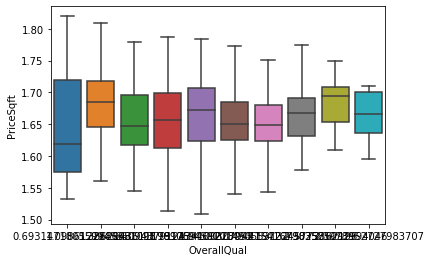

In [73]:
sns.boxplot(data=housing2, x='OverallQual', y='PriceSqft', showfliers=False)

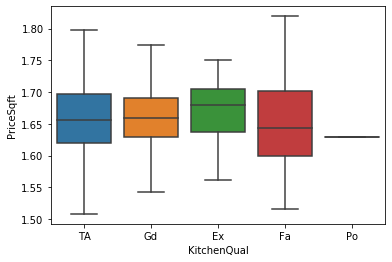

In [74]:
sns.boxplot(data=housing2, x='KitchenQual', y='PriceSqft', showfliers=False)

### Age of the House & Neighborhood VS Price Per Square Foot

In [75]:
# Creates column 'AgeWhenSold' which calculates the age of the house by the time it was sold
housing2['AgeWhenSold'] = housing2.YrSold - housing2.YearBuilt

AttributeError: 'DataFrame' object has no attribute 'YrSold'

In [76]:
# Creates dataframe with 'AgeWhenSold', 'Neighborhood' and 'PricePerSqft'
age_n = housing2[['AgeWhenSold', 'Neighborhood', 'PriceSqft']]

KeyError: "['AgeWhenSold'] not in index"

In [77]:
# Display the chart with the average of price per square foot per age
age_n.groupby(['AgeWhenSold']).agg({'PriceSqft' : 'mean'})

NameError: name 'age_n' is not defined

In [78]:
# Creates a grid for every neighborhoow to see the trend between "AgeWhenSold" and "PricePerSqFt"
age_n_plot = sns.FacetGrid(age_n, col="Neighborhood", col_wrap=7)
age_n_plot.map(plt.scatter, "AgeWhenSold", "PriceSqft", edgecolor="w").add_legend()
age_n_plot

NameError: name 'age_n' is not defined

- In the neighborhoods where its houses are built around the same year, they might have variation in prices due to different features of the house other than the age
- In the neighborhoods where its houses are built in different years, negative correlations are seen between the age and the price per square foot

### Trend of Price per Square Foot depending on its Built Year

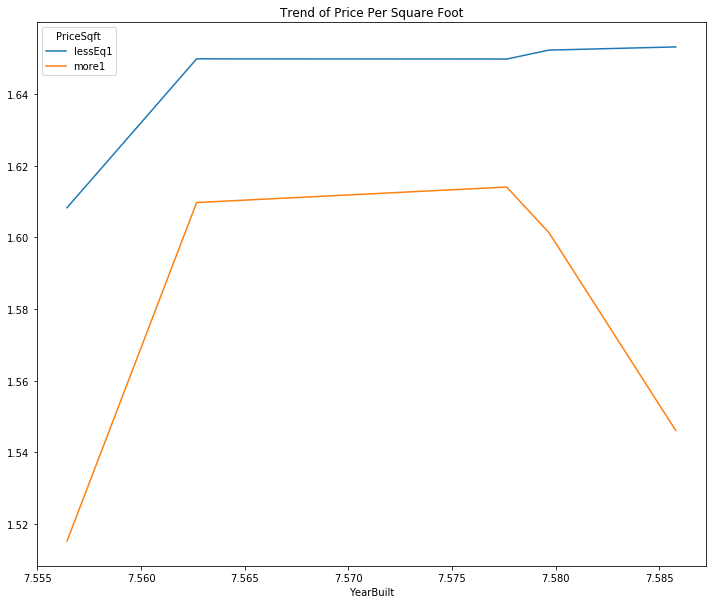

In [79]:
# Creates line plots depending on its difference in # of bathrooms and # of bedrooms
diff_df = housing2.groupby(['bb_diff','YearBuilt']).PriceSqft.mean()
diff_df = diff_df.unstack(level='bb_diff')
diff_df.columns.name = 'PriceSqft'
diff_df.dropna(subset=['lessEq1', 'more1']).plot(title = "Trend of Price Per Square Foot", figsize = (12,10))


# Modeling

In [94]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [95]:
x = pd.DataFrame(housing, columns = housing.columns)
x

,PID,GrLivArea,SalePrice,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,20.628049,6.753438,11.744045,RL,4.110874,8.973478,Pave,None,Reg,Lvl,...,Y,0.000000,0.000000,0.000000,5.117994,None,None,None,WD,Normal
2,20.623972,6.956545,11.845827,RL,3.761200,8.351375,Pave,None,Reg,Lvl,...,Y,0.000000,4.663439,0.000000,0.000000,None,None,None,WD,Normal
3,20.630194,6.909753,11.735277,C (all),4.110874,8.709630,Pave,None,Reg,Lvl,...,N,5.043425,0.000000,3.761200,0.000000,None,None,None,WD,Normal
4,20.098482,6.946976,11.643962,RL,4.394449,9.005405,Pave,None,Reg,Lvl,...,N,0.000000,0.000000,5.129899,4.718499,None,None,None,WD,Normal
5,20.096238,7.418181,12.332710,RL,4.262680,9.036106,Pave,None,Reg,Lvl,...,Y,0.000000,3.828641,0.000000,0.000000,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,20.621460,6.859615,11.703554,RL,3.960813,9.088738,Pave,None,Reg,Lvl,...,P,0.000000,4.595120,0.000000,3.713572,None,None,None,WD,Normal
760,20.623890,7.458186,11.846544,RL,4.189655,9.523763,Pave,None,IR1,Lvl,...,Y,0.000000,0.000000,0.000000,0.000000,None,None,None,WD,Normal
761,20.628158,7.602401,11.884496,RH,4.418841,8.743691,Pave,None,Reg,HLS,...,Y,0.000000,0.000000,0.000000,0.000000,None,None,None,WD,Normal
762,20.625865,7.519150,12.289959,RL,4.262680,9.085570,Pave,None,Reg,Lvl,...,Y,5.267858,4.574711,0.000000,0.000000,None,None,None,WD,Normal


In [96]:
y = pd.DataFrame(housing, columns = ["SalePrice"])
y

,SalePrice
1,11.744045
2,11.845827
3,11.735277
4,11.643962
5,12.332710
...,...
759,11.703554
760,11.846544
761,11.884496
762,12.289959


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [127]:
# Setting for K-fold cross validation
# Since this is not calssification, we can not use accuracy for scoring.
# So, we have to use RMSE to check acuarcy of the model
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [128]:
# This model may be very sensitive to outliers. So we need to made it more robust on them. 
# For that we use the sklearn's Robustscaler() method on pipeline
# LASSO Regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [129]:
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [130]:
# Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [131]:
# With huber loss that makes it robust to outliers
# Gradient Boosting Regression
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [132]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [133]:
# LightGBM
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [134]:
# Support Vector Regressor
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [135]:
# ____Grid search for SVR
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}
#model_svr = SVR()
#grid_search = GridSearchCV(model_svr, params, cv=10, scoring='neg_mean_squared_error')
#grid_search.fit(train, y_train)

In [136]:
#grid_search.best_estimator_

In [137]:
# Random Forest Regressor
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [138]:
# ____Grid search for RF
param_grid = [
    {'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250,300]},
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250]},
]

#forest_reg = RandomForestRegressor()
#grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
#grid_search.fit(train, y_train)

In [139]:
#grid_search.best_estimator_

# Model scores

In [140]:
# lasso scores
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\s


Lasso score: nan (nan)



In [112]:
# Elastic Net Regression scores
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

In [113]:
# Kernel Ridge Regression scores
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

In [114]:
# Gradient Boosting Regression scores
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

In [115]:
# XGBoost scores
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)


In [116]:
# LightGBM scores
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

In [117]:
# Support Vector Regressor
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

SVR score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

In [118]:
# RF Regressor
score = rmsle_cv(regr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

SVR score: nan (nan)



C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RL'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: could not convert string to float: 'RM'

  FitFailedWarning)
C:\Users\Minjae\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed.

# Prediction

In [119]:
#define a rmsle evaluation function

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

In [120]:
# XGBoost
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields MSZoning, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

In [121]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: MSZoning, Street, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

In [122]:
# Gradient Boosting Regression
GBoost.fit(x_train,y_train)
GB_train_pred = GBoost.predict(x_train)
GB_pred = np.expm1(GBoost.predict(x_test.values))
print(rmsle(y_train, GB_train_pred))

ValueError: could not convert string to float: 'RM'

In [123]:
# Elastic Net Regression
ENet.fit(x_train,y_train)
ENet_train_pred = ENet.predict(x_train)
ENet_pred = np.expm1(ENet.predict(x_test.values))
print(rmsle(y_train, ENet_train_pred))

ValueError: could not convert string to float: 'RM'

In [124]:
# Select Xgboost, LightGBM, Gradient Boosting Regression
ensemble = xgb_pred*0.25 + lgb_pred*0.25 + GB_pred*0.5 

NameError: name 'xgb_pred' is not defined